# 1. Introduction
=================================================

Milestone 1 - Data Analytics

Nama  : Sekar Meulu Mahrannisa  
Batch : HCK-031

Program ini berisi proses untuk:



=================================================

# 2. Problem Statement and Dataset Description

## Background

A new film company, “Seventeen” just got a capital from the stakeholder and planning to release a movie that can achieve high box office numbers and maximise its profits for capital return. The studio is willing to invest $100 million on a new summer box office hit. To solve this problem we would like to see what kind of movie the company should invest in and what kind of parameters that influence a movie's success.

## SMART & Problem Statement

| *SMART Criteria* | *Description*                                                                                                                                                                                                                                                                  |
| ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| *S (Specific)*   | Create box office success movie using data-driven formula. |
| *M (Measurable)* | Achieve a minimum profit of 200% from the initial budget.  |
| *A (Achievable)* | Make a movie with budget of $100 million using a strategy that will focus on data, analyzed from movie statistic from previous years.                                    |
| *R (Relevant)*   | The profit of 200% will ensure that the company get capital return and become profitable. The movie will also be considered as a success box office movie                                           |
| *T (Time-bound)* |The movie production must start next year and must be released in 3 years time during summer season.

Problem Statement = “Seventeen” film company is planning to create a new box office movie targeting 200% profit from its initial $100 million budget, With this achievable target it can ensure movie and studio success. The movie is expected to be released on cinemas during summer time on 2028


Dataset: 

The dataset that I use was from kaggle, titled "Movies (IMDb, Earnings and more)". Essentially it was a movie statistic data over the year. It includes 3,907 movie title with column such as Movie, Director, Actor(1,2,3), Running Time, Genre, Budget, Box Office, Actors and Directors Box Office %, Earnings, Awards, Nomination and IMDb Score.

Disclaimer: 
For this project we will only use and process the data from 2000-2016, because our project is expected for a 2028 release so we only examine the statictics from those years as consumer spending behaviour and movie's watcher behaviour tends to change over the decade(Waiping, Ng. 2022).

Dashboard: https://public.tableau.com/app/profile/sekar.mahrannisa/viz/MakingaHighEarningMovie/DataVisualization?publish=yes

Link to dataset: https://www.kaggle.com/datasets/delfinaoliva/movies
Journal reference: https://www.researchgate.net/publication/358945920_People's_Tendency_of_Watching_Films_Has_Already_Been_Influenced_the_Development_of_Information_Age

Problem Description
1. How fluctuates are the movie's profits over the year 2000-2016?
2. What are the average, median, and spread of Box Office earnings for movies based on genre with a budget between $90M–$110M (inflation unadjusted), in 2005–2016?
3. Which genre in this budget range is most profitable?
4. What genre is the most popular?
5. What is the most profitable movies and actors within the budget range of $100M?
6. Which is the most profitable director? 
7. Which measurable factors (budget, IMDb score, awards, etc.) have the strongest relationship with box office earnings?
8. Is there a statistically significant relationship between IMDb score and Box Office earnings for movies with similar budgets ($90M–$110M)?
9. Do award-winning films (Oscar/Golden Globes) earn significantly more than non-award-winning films?

# 3. Data Loading

In [1]:
# Imports
import pandas as pd
pd.set_option("display.max_columns", None)

""" Pandas is used for working with tabular data (DataFrames).
Commonly used for reading, cleaning, and analyzing datasets."""

import numpy as np

"""NumPy supports efficient numerical computations and array operations.
Useful for calculating statistical values like mean, median, etc."""

from scipy import stats

"""SciPy's stats module offers statistical tests and probability distributions.
Used for t-tests, correlation, normality tests, etc."""

import matplotlib.pyplot as plt
"""Matplotlib library, used to generate plots and graphs.
Can create line plots, bar charts, histograms, etc."""

import seaborn as sns
"""Statistical data visualization library built on top of Matplotlib.
Allows for clean and aesthetically pleasing plots (e.g., boxplots, heatmaps)."""

from IPython.core.display import display, HTML
""" Enableing display outputs (like formatted HTML) in Jupyter Notebooks.
Useful for customizing notebook output or embedding custom HTML/CSS."""

from scipy.stats import pointbiserialr, chi2_contingency


In [24]:
movies = pd.read_csv('P0M1_Sekar_M_dataset.csv', encoding= 'latin1')

movies.tail(15)

,Movie,Director,Running time,Actor 1,Actor 2,Actor 3,Genre,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
3959,You Can Count on Me,Kenneth Lonergan,111,Matthew Broderick,Rory Culkin,Gaby Hoffmann,Drama,1200000,9400000,41.67,50.00,8200000,2,1.0,2000,7.7
3960,You Got Served,Chris Stokes,95,Jennifer Freeman,Marques Houston,Steve Harvey,Drama,8000000,50000000,100.00,100.00,42000000,0,0.0,2004,3.5
3961,You Got Served: Beat the World,Robert Adetuyi,91,Shane Pollard,Mishael Morgan,Chase Armitage,Drama,10000000,8000000,0.00,0.00,-2000000,0,0.0,2011,4.5
3962,You Kill Me,John Dahl,93,Philip Baker Hall,Aaron Hughes,Jayne Eastwood,Comedy,4000000,2000000,36.66,0.00,-2000000,0,0.0,2007,6.5
3963,You Only Live Twice,Lewis Gilbert,117,Donald Pleasence,Burt Kwouk,Desmond Llewelyn,Action,9500000,111000000,100.00,100.00,101500000,2,0.0,1967,6.9
3964,Young Adult,Jason Reitman,94,Charlize Theron,Patton Oswalt,Collette Wolfe,Comedy,12000000,22800000,11.11,66.67,10800000,1,0.0,2011,6.3
3965,Young Frankenstein,Mel Brooks,106,Madeline Kahn,Peter Boyle,Teri Garr,Comedy,2800000,31000000,100.00,85.71,28200000,0,0.0,1974,8.0
3966,Young Guns,Christopher Cain,107,Jack Palance,Patrick Wayne,Brian Keith,Action,13000000,45000000,66.67,50.00,32000000,0,0.0,1988,6.8
3967,Your Sister's Sister,Lynn Shelton,90,Mark Duplass,Mike Birbiglia,Mel Eslyn,Comedy,125000,1700000,100.00,100.00,1575000,0,0.0,2011,6.7
3968,Youth in Revolt,Miguel Arteta,90,Steve Buscemi,Ari Graynor,Fred Willard,Comedy,18000000,19300000,66.67,75.00,1300000,0,0.0,2009,6.5


In this part of data loading, we would like to take a peek at what's the dataset represents.

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Movie                                3974 non-null   object 
 1   Director                             3974 non-null   object 
 2   Running time                         3974 non-null   int64  
 3   Actor 1                              3974 non-null   object 
 4   Actor 2                              3974 non-null   object 
 5   Actor 3                              3972 non-null   object 
 6   Genre                                3974 non-null   object 
 7   Budget                               3974 non-null   int64  
 8   Box Office                           3974 non-null   int64  
 9   Actors Box Office %                  3974 non-null   float64
 10  Director Box Office %                3974 non-null   float64
 11  Earnings                      

from this function now we know the data's types of each columns the datasets and so far the data's type coordinate with the columns so we can continue to do further analysis and no missing value found.

In [4]:
movies.duplicated() #no duplicated values found

0       False
1       False
2       False
3       False
4       False
        ...  
3969    False
3970    False
3971    False
3972    False
3973    False
Length: 3974, dtype: bool

In [5]:
movies['Release year'].unique() #to know the year range of the data

array([2016, 2006, 2009, 2013, 2003, 2008, 2014, 2010, 2007, 2001, 2004,
       1997, 1999, 1998, 1943, 1992, 2011, 2005, 2012, 1985, 1995, 1993,
       2000, 2015, 2002, 1990, 1994, 1971, 1987, 1989, 1996, 1982, 1972,
       1991, 1981, 1980, 1986, 1988, 1983, 1973, 1979, 1940, 1984, 1949,
       1937, 1977, 1964, 1955, 1969, 1966, 1968, 1962, 1961, 1978, 1960,
       1934, 1946, 1974, 1939, 1938, 1963, 1957, 1954, 1933, 1951, 1950,
       1975, 1944, 1970, 1942, 1958, 1965, 1953, 1947, 1930, 1952, 1941,
       1967, 1976, 1956, 1936, 1948, 1959, 1929, 1945, 1935])

In [6]:
earliest_year = movies['Release year'].min() 
oldest_year = movies['Release year'].max()
print(f'This datasets contains film statistics from year {earliest_year} to {oldest_year}.')
print(f'For further analysis we only gonna use the year 2000-{oldest_year} as we also take into consideration how film trends changes over the decade.')

This datasets contains film statistics from year 1929 to 2016.
For further analysis we only gonna use the year 2000-2016 as we also take into consideration how film trends changes over the decade.


In [7]:
movies.describe()

,Running time,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
count,3974.000000,3.974000e+03,3.974000e+03,3.974000e+03,3974.000000,3.974000e+03,3974.000000,3971.000000,3974.000000,3974.000000
mean,109.967036,3.690639e+07,1.086770e+08,2.984678e+09,52.780695,7.177060e+07,1.106694,0.321330,2002.043785,6.467866
std,22.507658,4.270431e+07,1.798354e+08,1.344684e+11,35.360199,1.526573e+08,2.724019,1.209324,12.127027,1.072514
min,20.000000,1.100000e+03,5.000000e+04,0.000000e+00,0.000000,-3.231000e+08,0.000000,0.000000,1929.000000,1.600000
25%,95.000000,9.000000e+06,1.200000e+07,3.333000e+01,25.000000,0.000000e+00,0.000000,0.000000,1998.000000,5.900000
50%,106.000000,2.200000e+07,4.300000e+07,5.714000e+01,50.000000,1.850000e+07,0.000000,0.000000,2005.000000,6.600000
75%,120.000000,5.000000e+07,1.250000e+08,8.333000e+01,80.000000,8.100000e+07,1.000000,0.000000,2010.000000,7.200000
max,330.000000,3.900000e+08,2.923000e+09,6.805556e+12,100.000000,2.686000e+09,22.000000,13.000000,2016.000000,9.300000


# 4. Data Cleaning

Data preparation in needed for a further clear analysis, in this part we will clean the data as such ;
1. Dropping unnecessary and irrelevant columns such as,
 - Actor 2 & 3 (It displays the name of the secondary and third leading actor) 
 - Actors Box Office (Percentage that reflects how many times the actors managed to at least double the budget in their other films movies) -> can cause an inconsistent result as not all actor stars in more than one film
 - Directors Box Office (Percentage that reflects how many times the director managed to at least double the budget in their other films movies) -> can cause an inconsistent result as not all director produce more than one film
 - Oscar and Golden Globes nominations (Amount of nominations that the movie had in the Oscars and the Golden Globes) -> we only will take into consideration the Award winner
 2. Sort the data to a certain year needed (2000-2016)

In [8]:
start_year = 2000
end_year = 2016

#menghapus beberapa kolom yang tidak relevan
cols_to_drop = [
    'Actor 2',
    'Actor 3',
    'Actors Box Office %',
    'Director Box Office %',
    'Oscar and Golden Globes nominations'
]

movies_clean = (
    movies[(movies['Release year'] >= start_year) & (movies['Release year'] <= end_year)]
      .drop(columns=cols_to_drop)
      .reset_index(drop=True) #filter untuk hanya menggunakan data pada tahun 2000-2016 karena adanya perbedaan tren minat konsumen terhadap menonton film
)
movies_clean

,Movie,Director,Running time,Actor 1,Genre,Budget,Box Office,Earnings,Oscar and Golden Globes awards,Release year,IMDb score
0,13 Hours,Michael Bay,144,Toby Stephens,Action,50000000,69400000,19400000,0.0,2016,7.4
1,16 Blocks,Richard Donner,102,Bruce Willis,Action,52000000,65000000,13000000,0.0,2006,6.6
2,17 Again,Burr Steers,102,Matthew Perry,Comedy,20000000,139000000,119000000,0.0,2009,6.4
3,1982,Tommy Oliver,90,Bokeem Woodbine,Drama,1000000,2000000,1000000,0.0,2013,7.1
4,2 Fast 2 Furious,John Singleton,107,Paul Walker,Action,76000000,236000000,160000000,0.0,2003,5.9
...,...,...,...,...,...,...,...,...,...,...,...
2814,Youth in Revolt,Miguel Arteta,90,Steve Buscemi,Comedy,18000000,19300000,1300000,0.0,2009,6.5
2815,Z Storm,David Lam,92,Michael Wong,Action,7000000,17000000,10000000,0.0,2014,5.3
2816,Zack and Miri Make a Porno,Kevin Smith,101,Gerry Bednob,Comedy,24000000,42000000,18000000,0.0,2008,6.6
2817,Zombieland,Ruben Fleischer,88,Emma Stone,Adventure,23600000,102000000,78400000,0.0,2009,7.7


In [9]:
movies_clean['Release year'].unique()

array([2016, 2006, 2009, 2013, 2003, 2008, 2014, 2010, 2007, 2001, 2004,
       2011, 2005, 2012, 2000, 2015, 2002])

In [10]:
#save cleaned dataframe into csv
movies_clean.to_csv('P0M1_Sekar_M_data_cleaned.csv')
#save for Tableu
movies_clean.to_excel('data_film_bersih.xlsx')

# 5. Exploration and Analysis

### 1. How fluctuates are the movie's profits over the year 2000-2016?

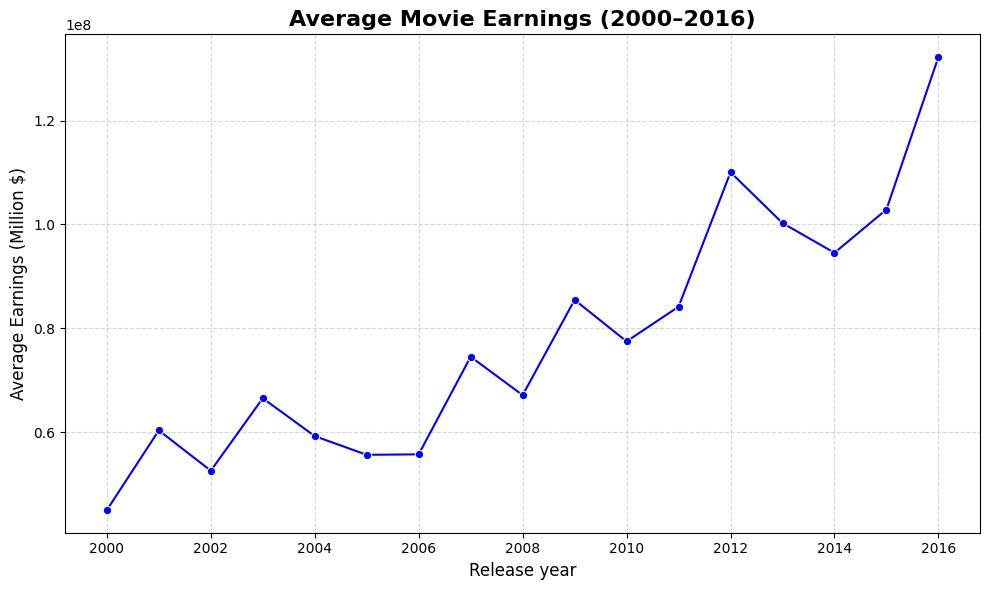

In [11]:
# Group by year and calculate average earnings
earnings_by_year = movies_clean.groupby('Release year')['Earnings'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=earnings_by_year, x='Release year', y='Earnings', marker='o', color='blue')

plt.title('Average Movie Earnings (2000–2016)', fontsize=16, weight='bold')
plt.xlabel('Release year', fontsize=12)
plt.ylabel('Average Earnings (Million $)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Highlight = From 2000 to 2016, average movie earnings showed an overall upward trend, with notable spikes around 2012 and a sharp peak in 2016, indicating a strong growth in box office performance in recent years.

### 2. What are the average, median, and spread of Box Office earnings for movies based on genre with a budget between $90M–$110M (inflation unadjusted), in 2000–2016?

In [12]:
budget_range = movies_clean[(movies_clean['Budget'] >= 90_000_000) & (movies_clean['Budget'] <= 110_000_000)]
desc_stats = budget_range.groupby('Genre')['Box Office'].agg(['mean', 'median', 'std']).reset_index().sort_values(by='mean', ascending=False)
print("=== Descriptive Statistics for $90M–$110M Budget Range by Genre ===")
print(desc_stats)

=== Descriptive Statistics for $90M–$110M Budget Range by Genre ===
       Genre          mean       median           std
2  Animation  3.530588e+08  268000000.0  2.513905e+08
1  Adventure  3.175000e+08  213000000.0  2.517532e+08
0     Action  3.074169e+08  244000000.0  2.256175e+08
5      Crime  2.697500e+08  261500000.0  7.331382e+07
6      Drama  2.353385e+08  173000000.0  1.924679e+08
3  Biography  2.345400e+08  214000000.0  1.098081e+08
4     Comedy  1.811625e+08  192000000.0  1.036865e+08
7     Sci-Fi  1.220000e+08  125000000.0  9.848858e+06


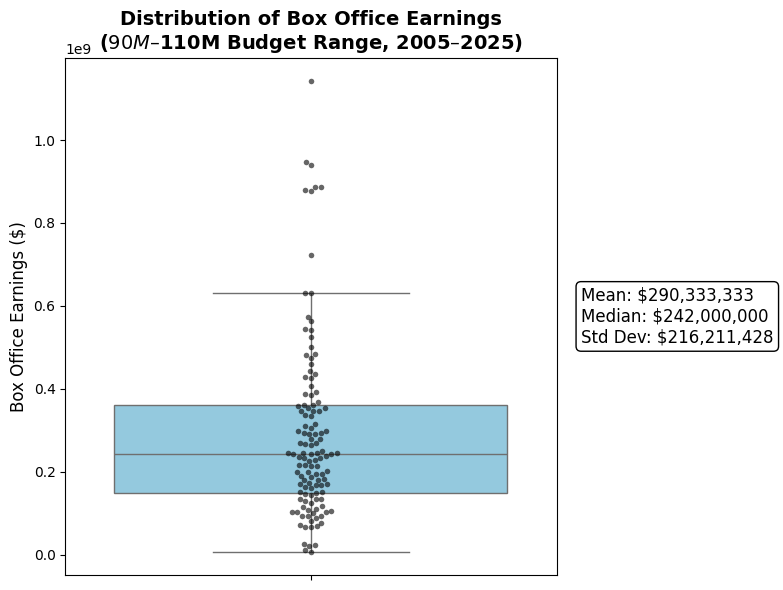

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only movies in budget range 90–110M
budget_range_df = movies_clean[(movies_clean['Budget'] >= 90_000_000) & (movies_clean['Budget'] <= 110_000_000)]

# Compute descriptive stats
mean_val = budget_range_df['Box Office'].mean()
median_val = budget_range_df['Box Office'].median()
std_val = budget_range_df['Box Office'].std()

plt.figure(figsize=(8,6))
sns.boxplot(data=budget_range_df, y='Box Office', color='skyblue', fliersize=0)  
sns.swarmplot(data=budget_range_df, y='Box Office', color='black', alpha=0.6, size=4)

plt.title("Distribution of Box Office Earnings\n($90M–$110M Budget Range, 2005–2025)", fontsize=14, weight='bold')
plt.ylabel("Box Office Earnings ($)", fontsize=12)
plt.xlabel("")

# Add text box with summary stats
textstr = '\n'.join((
    f"Mean: ${mean_val:,.0f}",
    f"Median: ${median_val:,.0f}",
    f"Std Dev: ${std_val:,.0f}"
))

plt.gca().text(1.05, 0.5, textstr, transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='center',
               bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.tight_layout()
plt.show()


Highlight = In the \$90M–\$110M budget range (2005–2016), Animation, Adventure, and Action have the highest average box office earnings, with Animation leading at $353M. Animation also shows a wide spread (high standard deviation), meaning returns can vary greatly. Sci-Fi performs the weakest ($122M average)with very low spread, indicating consistently lower returns. Genres like Drama and Comedy yield moderate earnings but lag behind the top three genres in profitability.

For maximizing returns in this budget range, focusing on Animation, Adventure, or Action offers the best potential, while Sci-Fi shows limited box office upside.



### 3. Which genre in this budget range is most profitable?

In [14]:
profit_by_genre = budget_range.groupby('Genre')['Earnings'].mean().reset_index().sort_values(by='Earnings', ascending=False)
most_profitable_genre = profit_by_genre.iloc[0]

print('\n=== Most Profitable Genre in $90M–$110M Range ===')
print(profit_by_genre)
print(f"\nRecommendation: Invest in {most_profitable_genre['Genre']} with an average profit of ${most_profitable_genre['Earnings']:,.0f}")



=== Most Profitable Genre in $90M–$110M Range ===
       Genre      Earnings
2  Animation  2.532941e+08
1  Adventure  2.187857e+08
0     Action  2.082305e+08
5      Crime  1.722500e+08
6      Drama  1.361077e+08
3  Biography  1.311400e+08
4     Comedy  8.553750e+07
7     Sci-Fi  2.133333e+07

Recommendation: Invest in Animation with an average profit of $253,294,118


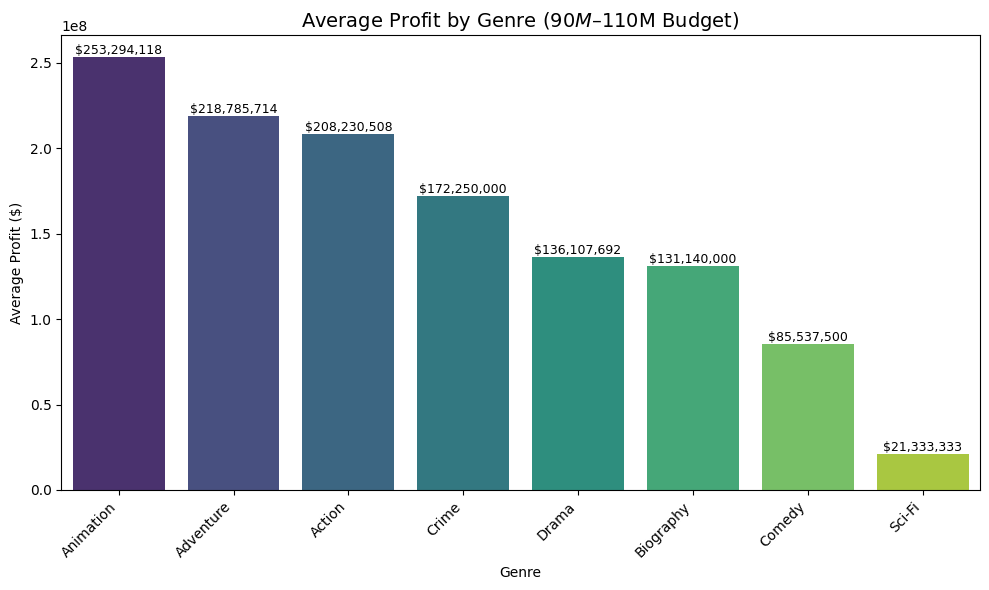

In [15]:
# Bar plot for most profitable genres
plt.figure(figsize=(10, 6))
sns.barplot(
    data=profit_by_genre,
    x='Genre',
    y='Earnings',
    hue = 'Genre',
    palette='viridis',
    legend=False
)

# Formatting
plt.title('Average Profit by Genre ($90M–$110M Budget)', fontsize=14)
plt.ylabel('Average Profit ($)')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')

# Show values on top of bars
for i, v in enumerate(profit_by_genre['Earnings']):
    plt.text(i, v, f"${v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In the $90M–$110M budget range, Animation, Adventure, and Action deliver the highest average box office returns, while Sci-Fi lags significantly behind.
Animation is showing a promising prospect as the most profitable genre with our current budget.

### 4. What genre is the most popular?

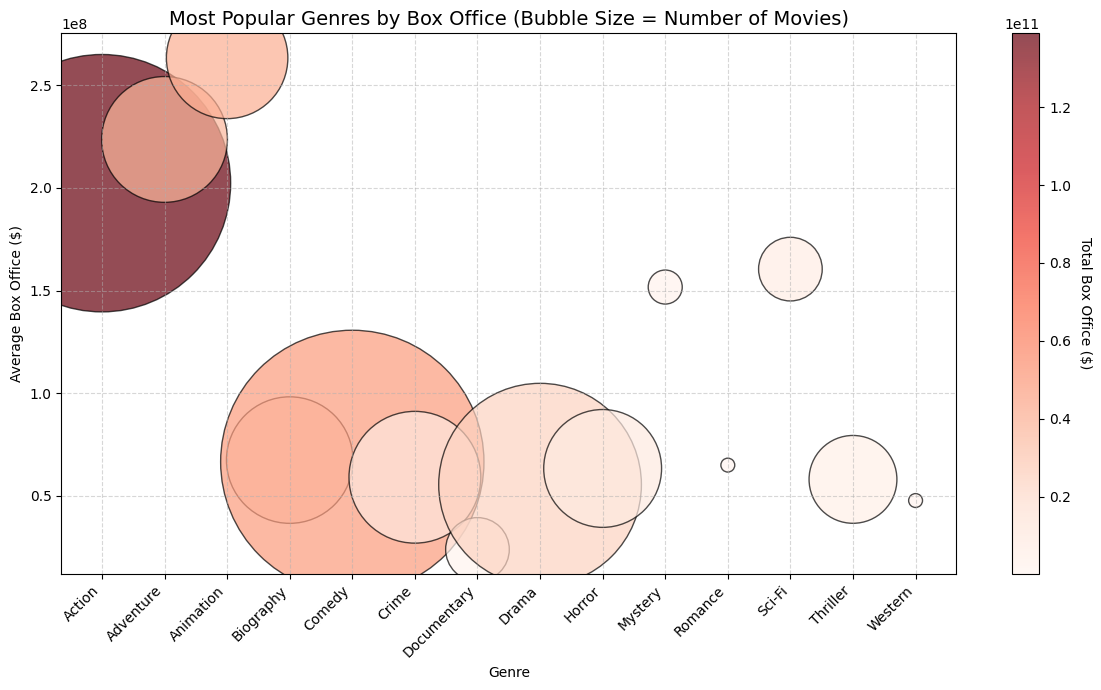

In [16]:
# --- Group data by genre ---
genre_stats = movies_clean.groupby('Genre').agg(
    total_box_office=('Box Office', 'sum'),
    avg_box_office=('Box Office', 'mean'),
    movie_count=('Genre', 'count')
).reset_index()

# --- Bubble chart ---
plt.figure(figsize=(12, 7))
bubble = plt.scatter(
    x=genre_stats['Genre'],
    y=genre_stats['avg_box_office'],
    s=genre_stats['movie_count'] * 50,  # scale bubble size
    c=genre_stats['total_box_office'],
    cmap='Reds',  # red gradient
    alpha=0.7,
    edgecolors='k'
)

# Add colorbar
cbar = plt.colorbar(bubble)
cbar.set_label('Total Box Office ($)', rotation=270, labelpad=15)

# Labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Average Box Office ($)')
plt.title('Most Popular Genres by Box Office (Bubble Size = Number of Movies)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


x-axis → Genre

y-axis → Average Box Office (or total Box Office)

Bubble size → Number of movies in that genre

Bubble color → Box Office value (darker = more popular)

From this chart we can now find out the genre popularity based on number of movies made in those genre(bubble size) or based on box office earnings of those genre(bubble color).

Comedy and Action genre are the most popular genre based on the most movies produced in. while Animation, Adventure and Action are the most popular based on the highest profit made.

### 5. What is the most profitable movies and actors within the budget range of $100M?

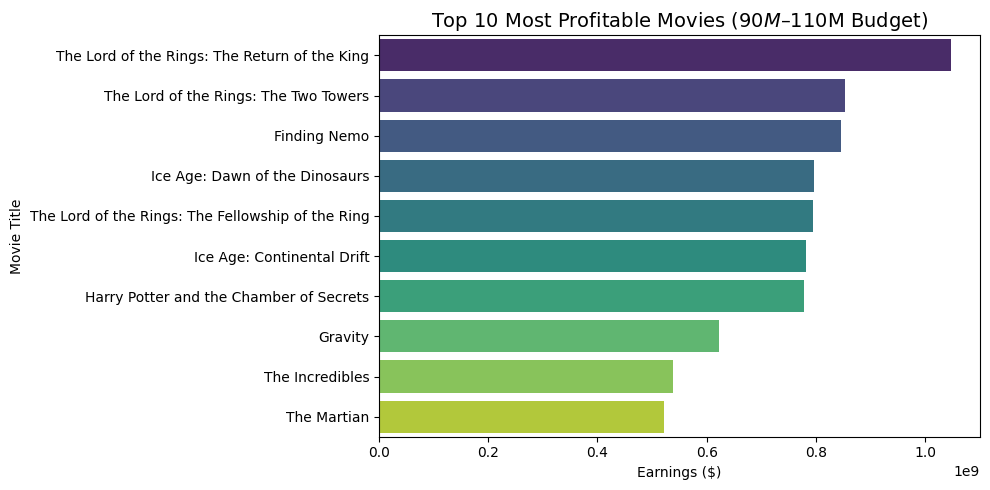

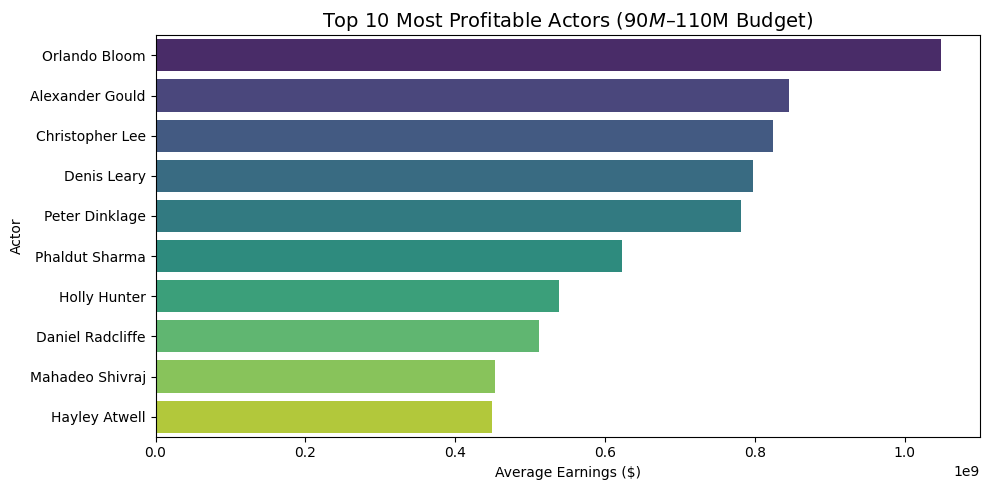

In [17]:
# Ensure we only use rows with Earnings
budget_range_earn = budget_range.dropna(subset=['Earnings'])

# --- 1. Most Profitable Movie Title ---
top_movies = budget_range[['Movie', 'Earnings']].sort_values(by='Earnings', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_movies,
    x='Earnings',
    y='Movie',
    hue = 'Movie',
    palette='viridis',
)
plt.title('Top 10 Most Profitable Movies ($90M–$110M Budget)', fontsize=14)
plt.xlabel('Earnings ($)')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

# --- 2. Most Profitable Actors ---
# Assuming "Actor 1" is your primary actor column
top_actors = budget_range.groupby('Actor 1')['Earnings'].mean().reset_index()
top_actors = top_actors.sort_values(by='Earnings', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_actors,
    x='Earnings',
    y='Actor 1',
    hue= 'Actor 1',
    palette='viridis',
)
plt.title('Top 10 Most Profitable Actors ($90M–$110M Budget)', fontsize=14)
plt.xlabel('Average Earnings ($)')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

Highlight = In the $90M–$110M budget category, the top 10 most profitable movies show a significant gap between the highest earner and the rest, indicating that a few standout titles and franchises dominate returns. Similarly, the top-performing actors in this range, Orlando bloom consistently appear in multiple high-grossing films, suggesting their strong box office draw and potential influence on profitability.

Investing in proven high-performing actors and replicating the strategies used in top-grossing titles could maximize returns in future productions within this budget range. However, diversification across genres and casts is still essential to mitigate risk from potential underperformance.

### 6. Who are the most profitable directors? 

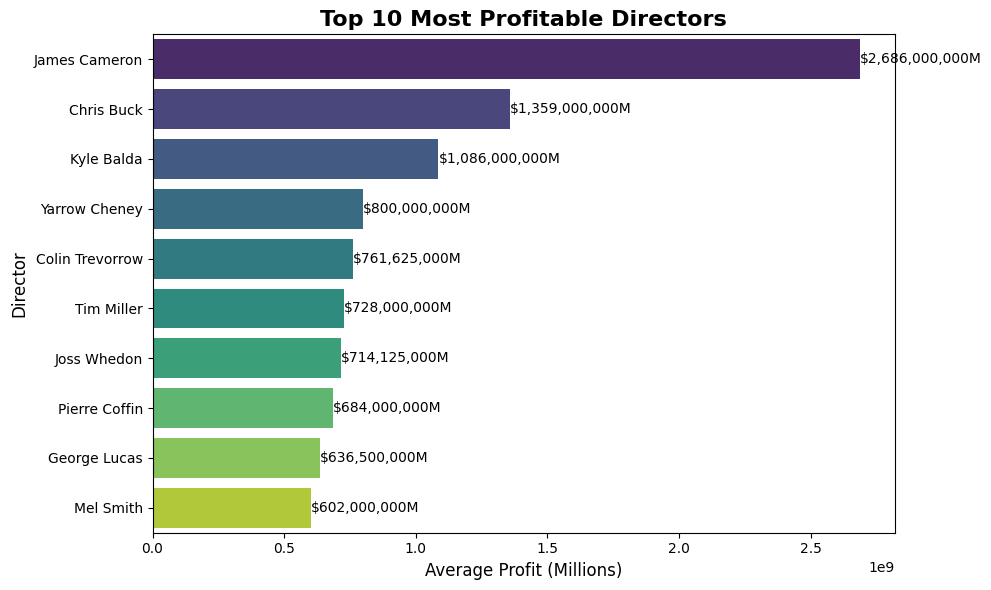

In [18]:
# Calculate average earnings per director
profit_by_director = movies_clean.groupby('Director')['Earnings'].mean().reset_index()

# Sort and select top 10
top_profitable_directors = profit_by_director.sort_values(by='Earnings', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_profitable_directors, 
            x='Earnings', 
            y='Director',
            hue= 'Director',
            palette='viridis')

plt.title('Top 10 Most Profitable Directors', fontsize=16, weight='bold')
plt.xlabel('Average Profit (Millions)', fontsize=12)
plt.ylabel('Director', fontsize=12)

# Add value labels
for index, value in enumerate(top_profitable_directors['Earnings']):
    plt.text(value + 1, index, f"${value:,.0f}M", va='center')

plt.tight_layout()
plt.show()


Highlight = James Cameron by far is the most profitable director in this budget range as he is noticeably known to direct a high profit successful franchise "Avatar" 

### 7. Which measurable factors (budget, IMDb score, awards, etc.) have the strongest relationship with box office earnings?

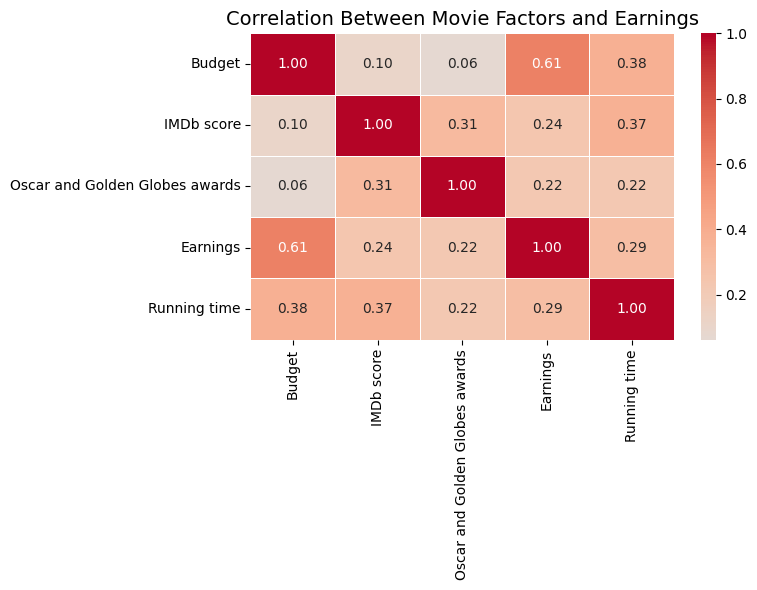

In [19]:
# --- Select measurable numeric columns ---
# Update these column names to match exactly your dataset
numeric_cols = ['Budget', 'IMDb score', 'Oscar and Golden Globes awards', 'Earnings', 'Running time']
df_numeric = movies_clean[numeric_cols]

# --- Compute correlation matrix ---
corr = df_numeric.corr()

# --- Plot correlation heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm", #color Red(low correlation), Yellow(neutral), Green(high correlation) 
    center=0,
    linewidths=0.5
)

plt.title("Correlation Between Movie Factors and Earnings", fontsize=14)
plt.tight_layout()
plt.show()


Highlight = The heatmap shows that budget has the highest positive correlation with earnings (0.61), suggesting that higher investments tend to generate higher box office returns. Running time (0.29) and IMDb score (0.24) show only modest correlations with earnings, while Oscar and Golden Globes awards have the weakest link (0.22), indicating that critical acclaim does not strongly translate into higher revenue.

While larger budgets generally drive higher earnings, other measurable factors like critical recognition, ratings, or runtime have limited direct impact on box office success. Profit strategies should focus on optimal budget allocation while balancing other creative and marketing elements.

### 8. Is there a statistically significant relationship between IMDb score and Box Office earnings for movies with similar budgets ($90M–$110M)?

In [20]:
print('Average of IMDb Score:',movies_clean['IMDb score'].mean(),'points')
print('Median of IMDb Score:',movies_clean['IMDb score'].median(),'points')
print('Mode of IMDb Score:',movies_clean['IMDb score'].mode(),'points')


Average of IMDb Score: 6.367825470024832 points
Median of IMDb Score: 6.5 points
Mode of IMDb Score: 0    6.7
Name: IMDb score, dtype: float64 points


In [21]:
print('Average of Box Office:',movies_clean['Box Office'].mean(),'points')
print('Median of Box Office:',movies_clean['Box Office'].median(),'points')
print('Mode of Box Office:',movies_clean['Box Office'].mode(),'points')

Average of Box Office: 118066231.99716212 points
Median of Box Office: 48000000.0 points
Mode of Box Office: 0    1000000
Name: Box Office, dtype: int64 points


The test above is to check the normality from the data spread of IMDb score and Box office, while IMDb scores shows a more normal leaning data. Box office number shows a positive skew data. so based on this result I choose to use the spearman method

In [22]:
budget_range_scores = budget_range[['IMDb score', 'Box Office']].dropna()
corr, p_value = stats.spearmanr(budget_range_scores['IMDb score'], budget_range_scores['Box Office'])

print("\n=== Inferential Statistics: IMDb score vs. Box Office ===")
print(f"Spearman correlation: {corr:.4f}")
print(f"P-value: {p_value:.8f}")
if p_value < 0.05:
    print("Result: Statistically significant relationship.")
else:
    print("Result: No statistically significant relationship.")


=== Inferential Statistics: IMDb score vs. Box Office ===
Spearman correlation: 0.4089
P-value: 0.00000265
Result: Statistically significant relationship.


Highlight = 
The Spearman correlation (0.409) indicates a moderate positive relationship between IMDb scores and box office earnings. The very low p-value means this relationship is statistically significant, so it’s unlikely to be due to chance.
Movies with higher IMDb scores tend to earn more at the box office, though the relationship is not extremely strong.

Quality, as reflected in IMDb ratings, appears to contribute to box office success, but it is one of several factors influencing earnings.


### 9. Do award-winning films (Oscar/Golden Globes) earn significantly more than non-award-winning films?

In [23]:
if 'Oscar and Golden Globes awards' in movies_clean:
    award_stats = budget_range.groupby('Oscar and Golden Globes awards')['Box Office'].agg(['mean', 'median', 'count']).reset_index()
    print("\n=== Average Box Office: Award-winning vs. Non-award-winning ===")
    print(award_stats)

    # T-test
    awards_yes = budget_range[budget_range['Oscar and Golden Globes awards'] == 1]['Box Office'].dropna()
    awards_no = budget_range[budget_range['Oscar and Golden Globes awards'] == 0]['Box Office'].dropna()
    t_stat, p_val_award = stats.ttest_ind(awards_yes, awards_no, equal_var=False)
    print(f"T-test p-value: {p_val_award:.4f}")
    print()


=== Average Box Office: Award-winning vs. Non-award-winning ===
   Oscar and Golden Globes awards          mean        median  count
0                             0.0  2.473461e+08  2.205000e+08    102
1                             1.0  4.359500e+08  4.065000e+08      6
2                             2.0  3.941429e+08  3.530000e+08      7
3                             3.0  4.440000e+08  4.440000e+08      1
4                             4.0  5.890000e+08  5.890000e+08      2
5                             5.0  3.365000e+08  3.365000e+08      2
6                             6.0  9.470000e+08  9.470000e+08      1
7                             7.0  7.230000e+08  7.230000e+08      1
8                            11.0  1.142000e+09  1.142000e+09      1
T-test p-value: 0.1778



Highlight 
H0 = Award-winning films didn't earn significantly higher than non-award-winning films.

H1 = Award-winning films did earn significantly higher than non-award-winning films.

A t-test checks if the average box office earnings differ significantly between award-winning and non-award-winning films. The p-value (0.1778) is above 0.05, meaning the difference is not statistically proven. So an Award-winning films didn't really earn significantly higher than those with no awards.
Awards may be associated with higher earnings in some cases, but based on this data, we can’t confidently say they consistently lead to significantly greater box office revenue.

# 6. Conclusion

Based on movie data from 2000–2016, a $100M budget should be strategically allocated to maximize profitability. The most profitable genres in this range are **Animation, Adventure, and Action**, with Animation showing the strongest potential. Proven box office draws—such as top actors like Orlando Bloom, successful franchises, and high-performing directors like James Cameron—play a key role in maximizing returns. Budget remains the strongest driver of earnings, while IMDb scores show a moderate positive impact, indicating that quality matters but is not the sole factor. Awards, however, do not guarantee significantly higher revenue. To achieve success, focus on producing high-quality films in top-performing genres, casting bankable actors, and investing in proven creative talent, while balancing creativity and marketing to reduce the risk of underperformance.
